<a href="https://colab.research.google.com/github/DarianSawali/Computer-Vision-Project-Overview/blob/main/Computer%20Vision%20YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
%matplotlib inline

import matplotlib
matplotlib.use('module://matplotlib_inline.backend_inline')


In [2]:
!pip3 install -q ultralytics opencv-python
import ultralytics
ultralytics.checks()


Ultralytics 8.3.218 🚀 Python-3.13.7 torch-2.9.0 CPU (Apple M4)
Setup complete ✅ (10 CPUs, 16.0 GB RAM, 91.9/460.4 GB disk)


In [3]:
from pathlib import Path
import yaml

data_yaml = Path.home() / "Downloads" / "TACO dataset.v1i.yolov8" / "data.yaml"
print("YAML exists:", data_yaml.exists(), "\nPath:", data_yaml)

with open(data_yaml, "r") as f:
    y = yaml.safe_load(f)

print("nc:", y.get("nc"))
print("names:", y.get("names"))

YAML exists: True 
Path: /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/data.yaml
nc: 6
names: ['cardboard', 'glass', 'metal', 'other', 'paper', 'plastic']


In [4]:
from ultralytics import YOLO
import torch

device = "mps" if torch.backends.mps.is_available() else "cpu"
print("Using device:", device)

Using device: mps


In [5]:
model = YOLO("yolov8n.pt")

results = model.train(
    data=str(data_yaml),
    epochs=8,
    imgsz=512,
    batch=8,
    workers=0,
    patience=5,
    device=device
)

New https://pypi.org/project/ultralytics/8.3.221 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.218 🚀 Python-3.13.7 torch-2.9.0 MPS (Apple M4)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/data.yaml, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=8, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=

In [10]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO("/Users/darianaxelsawali/runs/detect/train6/weights/best.pt")

results = model.val(
    data="/Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/data.yaml",
    split="val",
    imgsz=512,
    device="mps",
    plots=True
)

print("Curves regenerated. Check:", results.save_dir)


Ultralytics 8.3.218 🚀 Python-3.13.7 torch-2.9.0 MPS (Apple M4)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1977.3±353.7 MB/s, size: 1683.1 KB)
val: Scanning /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/valid/labels.cache... 199 images, 4 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 199/199 805.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 1.5it/s 8.5s
                   all        199        357      0.283      0.274      0.145     0.0945
             cardboard         15         18     0.0804      0.222     0.0707     0.0425
                 glass         14         26          0          0     0.0212     0.0134
                 metal         39         79      0.256      0.741      0.463      0.318
                 other         11         12          1          0     0.0303     0.0231
                 paper   

In [12]:
from pathlib import Path

RUN_DIR = Path("runs/detect/train6")
WEIGHTS = RUN_DIR / "weights" / "best.pt"

DATA_YAML = Path("/Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/data.yaml")

print("Run dir exists:", RUN_DIR.exists())
print("Best weights exist:", WEIGHTS.exists())
print("Data YAML exists:", DATA_YAML.exists())


Run dir exists: True
Best weights exist: True
Data YAML exists: True


In [16]:
from pathlib import Path
import shutil

run_dir = Path("runs/detect/train6")
export_dir = Path("/Users/darianaxelsawali/Desktop/YOLO_Milestone_Export")
export_dir.mkdir(parents=True, exist_ok=True)

for fname in ["confusion_matrix.png", "BoxPR_curve.png", "BoxF1_curve.png", "results.png"]:
    src = run_dir / fname
    if src.exists():
        shutil.copy(src, export_dir / fname)
        print("Exported:", export_dir / fname)
    else:
        print("Missing:", src)



Exported: /Users/darianaxelsawali/Desktop/YOLO_Milestone_Export/confusion_matrix.png
Exported: /Users/darianaxelsawali/Desktop/YOLO_Milestone_Export/BoxPR_curve.png
Exported: /Users/darianaxelsawali/Desktop/YOLO_Milestone_Export/BoxF1_curve.png
Exported: /Users/darianaxelsawali/Desktop/YOLO_Milestone_Export/results.png


In [21]:
from ultralytics import YOLO

model = YOLO("runs/detect/train6/weights/best.pt")
pred_dir = Path("runs/preds/train6_preds"); pred_dir.mkdir(parents=True, exist_ok=True)

preds = model.predict(
    source=str(test_dir),
    imgsz=512,
    conf=0.25,
    save=True,
    project="runs/preds",
    name="train6_preds",
    device="mps"
)

print("Predictions saved to:", preds[0].save_dir)



image 1/199 /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/test/images/000000_JPG.rf.809c9efd1df6d60750de643e9a5ea4be.jpg: 512x384 1 plastic, 3085.3ms
image 2/199 /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/test/images/000002_JPG.rf.097a2803df0688841871407c100f6f7b.jpg: 512x384 1 plastic, 14.8ms
image 3/199 /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/test/images/000003_JPG.rf.05176d2f307b3e0866bc62e6a2ef138f.jpg: 512x384 (no detections), 11.6ms
image 4/199 /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/test/images/000003_JPG.rf.234e1f64e70e58a44f7054cbc6974569.jpg: 384x512 1 metal, 1 plastic, 2259.2ms
image 5/199 /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/test/images/000004_JPG.rf.36b2623c1b4e961bd47bd47fac2c58ae.jpg: 384x512 (no detections), 11.9ms
image 6/199 /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/test/images/000005_JPG.rf.6ddd11456838e7b6271ef055ee42a65d.jpg: 384x512 (no detections), 11.9ms
image 7/

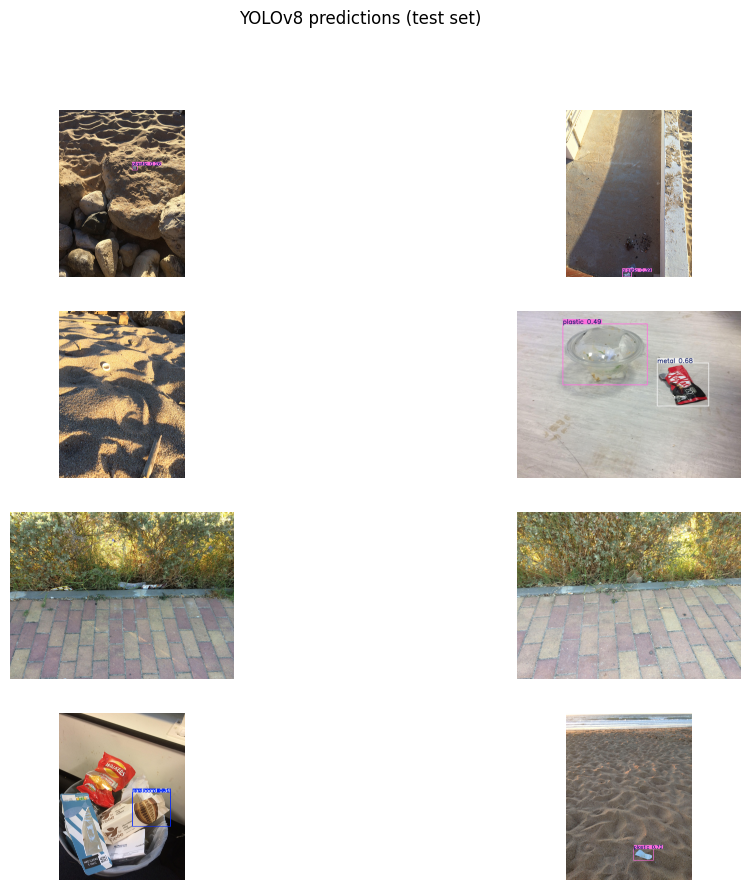

In [36]:
from PIL import Image
import matplotlib.pyplot as plt

viz = Path("runs/preds/train6_preds2")
imgs = sorted(viz.glob("*.*"))[:8]
plt.figure(figsize=(12, 10))
for i,p in enumerate(imgs,1):
    plt.subplot(4,2,i); plt.imshow(Image.open(p)); plt.axis("off")
plt.suptitle("YOLOv8 predictions (test set)")
plt.show()


Export dir: /Users/darianaxelsawali/Desktop/YOLO_Milestone_Export exists: True


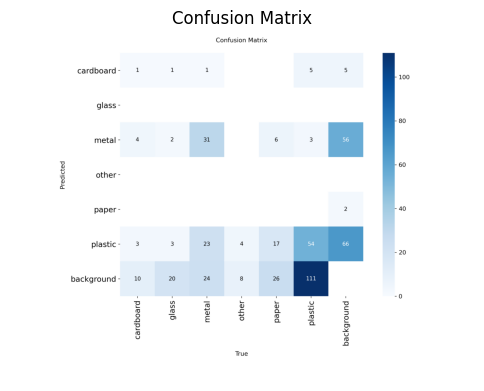

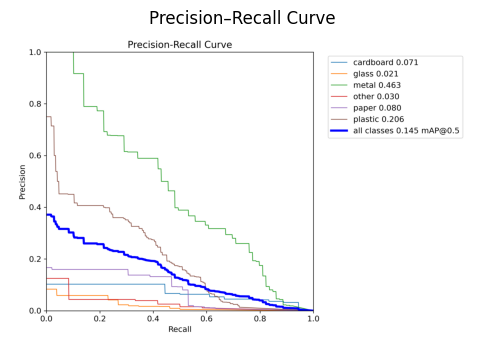

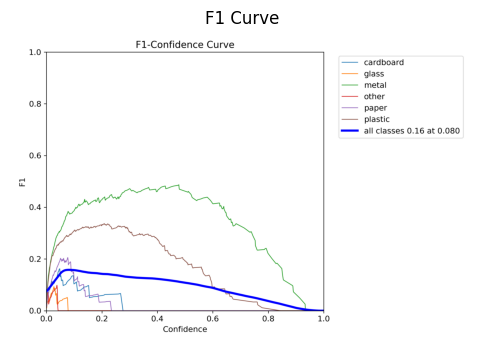

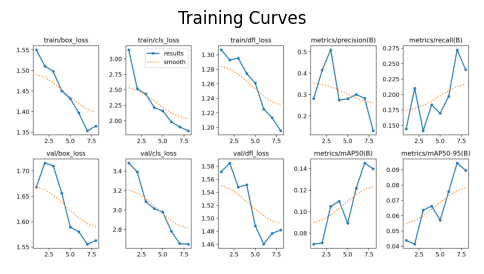

In [30]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

export_dir = Path.cwd() / "Desktop" / "YOLO_Milestone_Export"
print("Export dir:", export_dir, "exists:", export_dir.exists())

for name, title in [
    ("confusion_matrix.png", "Confusion Matrix"),
    ("BoxPR_curve.png", "Precision–Recall Curve"),
    ("BoxF1_curve.png", "F1 Curve"),
    ("results.png", "Training Curves"),
]:
    p = export_dir / name
    if p.exists():
        plt.figure(figsize=(6,6))
        plt.imshow(Image.open(p).convert("RGB")); plt.axis("off"); plt.title(title)
        plt.show()
    else:
        print("Not found:", p)


In [26]:
import shutil
from pathlib import Path

src = Path("/Users/darianaxelsawali/runs")
dst = Path("/Users/darianaxelsawali/Desktop/YOLO_Runs_Backup")
shutil.copytree(src, dst, dirs_exist_ok=True)
print("Copied to:", dst)


Copied to: /Users/darianaxelsawali/Desktop/YOLO_Runs_Backup
